                                  Week3:Basic Modeling

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from  sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset 
df = pd.read_csv("Cleaned_dataset.csv")
print("Dataset Loaded:", df.shape)


Dataset Loaded: (1300, 6)


In [1]:
import pandas as pd

baseline = pd.Series(y_train).value_counts().max() / len(y_train)
print("Baseline Accuracy:", baseline)

NameError: name 'y_train' is not defined

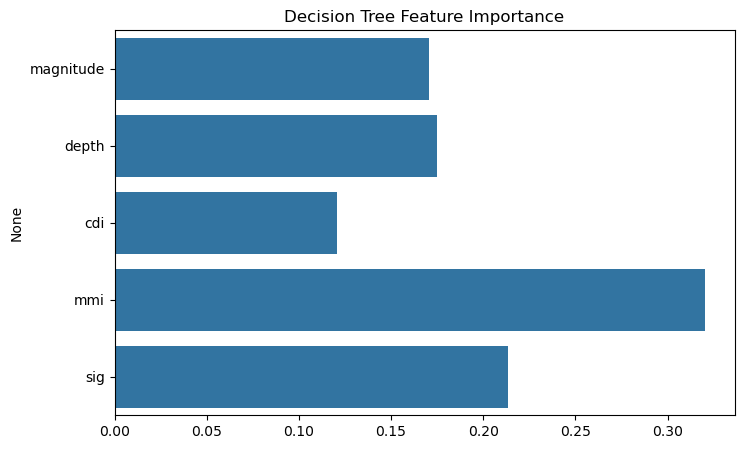

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=dt.feature_importances_, y=X.columns)
plt.title("Decision Tree Feature Importance")
plt.show()


In [4]:
preferred = ['alert','Alert','label','Label','class','Class','target']
target = None
for col in preferred:
    if col in df.columns:
        target = col
        break

if target is None:
    small_unique = [c for c in df.columns if df[c].nunique() <= 10]
    target = small_unique[0] if small_unique else df.columns[-1]

print("Target column:", target)

Target column: alert


In [5]:
# ---- X and y ----
y = df[target]
X = df.drop(columns=[target])

if y.dtype == 'object':
    
    y = pd.factorize(y)[0]

if df[target].nunique() > 10:
    median_val = df[target].median()
    y = (df[target] > median_val).astype(int)


In [6]:
# Preprocess
X = pd.get_dummies(X, drop_first=True)

for col in X.columns:
    if X[col].isnull().sum() > 0:
        if np.issubdtype(X[col].dtype, np.number):
            X[col].fillna(X[col].median(), inplace=True)
        else:
            X[col].fillna(X[col].mode()[0], inplace=True)

num_cols = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
pred_log = logreg.predict(X_test)



In [9]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

In [10]:
# Metrics
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, pred_log))
print("MAE:", mean_absolute_error(y_test, pred_log))
print(classification_report(y_test, pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_log))

print("\n--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, pred_dt))
print("MAE:", mean_absolute_error(y_test, pred_dt))
print(classification_report(y_test, pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_dt))


--- Logistic Regression ---
Accuracy: 0.6307692307692307
MAE: 0.4307692307692308
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        65
           1       0.44      0.51      0.47        65
           2       0.60      0.43      0.50        65
           3       0.71      0.80      0.75        65

    accuracy                           0.63       260
   macro avg       0.63      0.63      0.63       260
weighted avg       0.63      0.63      0.63       260

Confusion Matrix:
 [[51 12  1  1]
 [14 33 10  8]
 [ 0 25 28 12]
 [ 0  5  8 52]]

--- Decision Tree ---
Accuracy: 0.8423076923076923
MAE: 0.19615384615384615
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        65
           1       0.78      0.83      0.81        65
           2       0.83      0.82      0.82        65
           3       0.86      0.92      0.89        65

    accuracy                           0.84       260


In [11]:


# ----------------- COLOR FUNCTIONS ----------------------
def color_text_bg(text, color):
    colors = {
        "green": "\033[92m\033[42m",  
        "red": "\033[91m\033[41m",     
        "yellow": "\033[93m\033[43m",  
        "reset": "\033[0m"             
    }
    return f"{colors[color]}{text}{colors['reset']}"


def colored_prediction(pred):
    if pred == 0:
        return color_text_bg(" LOW RISK ", "green")
    elif pred == 1:
        return color_text_bg(" HIGH ALERT ", "red")
    elif pred == 2:
        return color_text_bg(" MODERATE ", "yellow")
    else:
        return str(pred)


# ----------------- PRINT ONLY FIRST 5 PREDICTIONS ----------------------
print("\n--- COLORED PREDICTIONS (FIRST 5 SAMPLES) ---")

for i, p in enumerate(pred_log[:5]):   # Only first 5 predictions
    print(f"Sample {i+1}: {colored_prediction(p)}")



--- COLORED PREDICTIONS (FIRST 5 SAMPLES) ---
Sample 1: 3
Sample 2:  HIGH ALERT 
Sample 3:  HIGH ALERT 
Sample 4:  HIGH ALERT 
Sample 5: 3


                              WEEK4:ADVANCED MODELLING 

In [12]:
#Train a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.9153846153846154
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        68
           1       0.84      0.93      0.88        55
           2       0.91      0.95      0.93        73
           3       0.98      0.95      0.97        64

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.91       260
weighted avg       0.92      0.92      0.92       260



In [23]:
# ---- TRAIN GRADIENT BOOSTING MODEL ----
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# ---- PREDICT ----
y_pred = gb.predict(X_test)

# ---- METRICS ----
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9153846153846154
Precision: 0.9157343527021311
Recall: 0.9153846153846154
F1 Score: 0.9146525494613105

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        68
           1       0.86      0.91      0.88        55
           2       0.92      0.95      0.93        73
           3       0.95      0.98      0.97        64

    accuracy                           0.92       260
   macro avg       0.91      0.92      0.91       260
weighted avg       0.92      0.92      0.91       260



In [24]:
#cross validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Random Forest CV Scores: [0.89615385 0.90384615 0.89615385 0.90384615 0.94230769]
Mean CV Score: 0.9084615384615384


In [25]:
#Hyperparameter Tuning (Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, n_jobs=-1, verbose=1)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_rf = grid.best_estimator_

y_pred_best = best_rf.predict(X_test)
print("Best RF Accuracy:", accuracy_score(y_test, y_pred_best))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best RF Accuracy: 0.9115384615384615


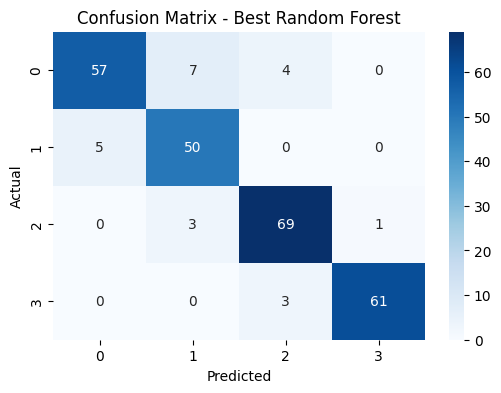

In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Best Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


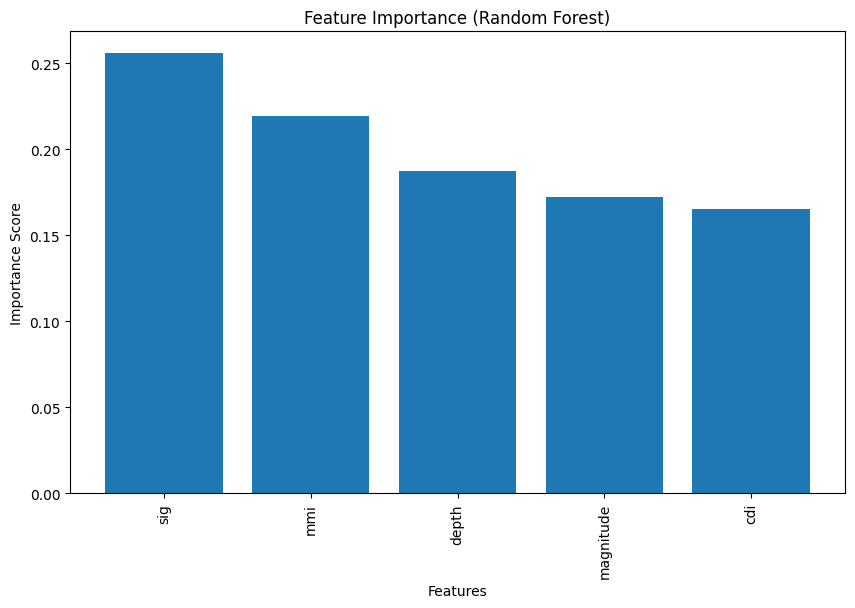

In [27]:
#feature importance graph
import numpy as np

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [28]:
import numpy as np

# ---- 5 sample test inputs (replace with your actual feature count!) ----
sample_input = np.array([
    [3, 4, 2, 1, 5],
    [1, 0, 4, 2, 3],
    [2, 3, 1, 0, 4],
    [4, 1, 3, 2, 0],
    [0, 2, 4, 3, 1]
])

# ---- COLOR OUTPUT WITH BACKGROUND COLORS ----

def color_text_bg(text, color):
    colors = {
        "green": "\033[92m\033[42m",
        "red": "\033[91m\033[41m",
        "yellow": "\033[93m\033[43m",
        "reset": "\033[0m"
    }
    return f"{colors[color]}{text}{colors['reset']}"


def colored_prediction(pred):
    if pred == 0:
        return color_text_bg(" LOW RISK (GREEN) ", "green")
    elif pred == 1:
        return color_text_bg(" HIGH ALERT (RED) ", "red")
    elif pred == 2:
        return color_text_bg(" MODERATE (YELLOW) ", "yellow")
    else:
        return str(pred)


print("\n--- ADVANCED MODEL PREDICTIONS (FIRST 5 SAMPLES) ---")

rf_preds = rf.predict(sample_input)
gb_preds = gb.predict(sample_input)

print("\nRandom Forest:")
for i, p in enumerate(rf_preds[:5]):
    print(f"Sample {i+1}: {colored_prediction(p)}")

print("\nGradient Boosting:")
for i, p in enumerate(gb_preds[:5]):
    print(f"Sample {i+1}: {colored_prediction(p)}")



--- ADVANCED MODEL PREDICTIONS (FIRST 5 SAMPLES) ---

Random Forest:
Sample 1:  MODERATE (YELLOW) 
Sample 2:  MODERATE (YELLOW) 
Sample 3: 3
Sample 4:  HIGH ALERT (RED) 
Sample 5:  MODERATE (YELLOW) 

Gradient Boosting:
Sample 1:  MODERATE (YELLOW) 
Sample 2:  HIGH ALERT (RED) 
Sample 3: 3
Sample 4:  MODERATE (YELLOW) 
Sample 5:  MODERATE (YELLOW) 


c:\Users\vishnu priya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\vishnu priya\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


                  XG BOOST MODEL

In [29]:
# ---- TRAIN XGBOOST MODEL ----
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)


xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:\n", cm)


XGBoost Accuracy: 0.9153846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.88        68
           1       0.85      0.93      0.89        55
           2       0.90      0.96      0.93        73
           3       0.98      0.95      0.97        64

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.91       260
weighted avg       0.92      0.92      0.92       260


Confusion Matrix:
 [[56  7  5  0]
 [ 4 51  0  0]
 [ 0  2 70  1]
 [ 0  0  3 61]]


In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


gb_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


def metrics(y_true, y_pred):
    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, average='weighted', zero_division=0),
        recall_score(y_true, y_pred, average='weighted', zero_division=0),
        f1_score(y_true, y_pred, average='weighted', zero_division=0)
    ]

results = []
results.append(["Random Forest"] + metrics(y_test, y_pred_rf))
results.append(["Gradient Boosting"] + metrics(y_test, y_pred_gb))
results.append(["XGBoost"] + metrics(y_test, y_pred_xgb))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print(results_df)


               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.915385   0.917978  0.915385  0.915400
1  Gradient Boosting  0.919231   0.918982  0.919231  0.918926
2            XGBoost  0.915385   0.918066  0.915385  0.915127


In [31]:
print("FINAL CONCLUSION\n")

best_model = results_df.loc[results_df["Accuracy"].idxmax()]
print("Best Model Based on Accuracy:")
print(best_model)

if best_model["Model"] == "XGBoost":
    print("\n XGBoost performs best on this dataset. Recommended for deployment.")
elif best_model["Model"] == "Random Forest":
    print("\n Random Forest performs best. Stable and simple – good for deployment.")
else:
    print(" Gradient Boosting performs best. Good for small datasets.")


FINAL CONCLUSION

Best Model Based on Accuracy:
Model        Gradient Boosting
Accuracy              0.919231
Precision             0.918982
Recall                0.919231
F1 Score              0.918926
Name: 1, dtype: object
 Gradient Boosting performs best. Good for small datasets.


In [32]:

# ---- Example: 5 new sample inputs ----
# Replace the values below with actual feature values
sample_inputs = np.array([
    [5.2, 10.1, 3.5, 0.2, 7.0],  # Sample 1
    [4.8, 12.0, 3.2, 0.5, 6.8],  # Sample 2
    [6.0, 11.5, 4.0, 0.3, 7.2],  # Sample 3
    [5.5, 10.8, 3.8, 0.4, 7.1],  # Sample 4
    [5.0, 11.0, 3.6, 0.2, 6.9]   # Sample 5
])

# Convert to DataFrame if needed (matching your original feature names)
sample_df = pd.DataFrame(sample_inputs, columns=X_train.columns)

# ---- Make predictions using trained models ----
rf_preds = rf_model.predict(sample_df)
gb_preds = gb_model.predict(sample_df)
xgb_preds = xgb_model.predict(sample_df)

# ---- Show predictions ----
predictions_df = pd.DataFrame({
    "Sample": [1, 2, 3, 4, 5],
    "Random Forest": rf_preds,
    "Gradient Boosting": gb_preds,
    "XGBoost": xgb_preds
})

print(predictions_df)


   Sample  Random Forest  Gradient Boosting  XGBoost
0       1              3                  3        1
1       2              2                  2        1
2       3              3                  3        1
3       4              3                  3        1
4       5              3                  3        1


In [33]:
xgb_preds = xgb_model.predict(sample_input)

print("\n--- XGBoost Predictions (First 5 Samples) ---")

for i, p in enumerate(xgb_preds[:5]):
    print(f"Sample {i+1}: {colored_prediction(p)}")


--- XGBoost Predictions (First 5 Samples) ---
Sample 1:  MODERATE (YELLOW) 
Sample 2:  MODERATE (YELLOW) 
Sample 3:  LOW RISK (GREEN) 
Sample 4:  HIGH ALERT (RED) 
Sample 5:  MODERATE (YELLOW) 


                   Week 5: Evaluation & Explainability

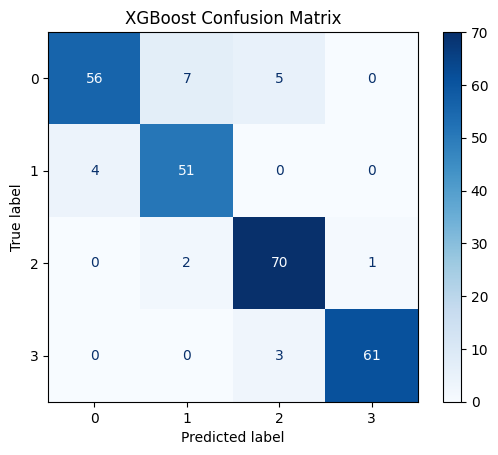

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = xgb_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost Confusion Matrix")
plt.show()


MAE: 1.3323131160380188, MSE: 3.294578911631911


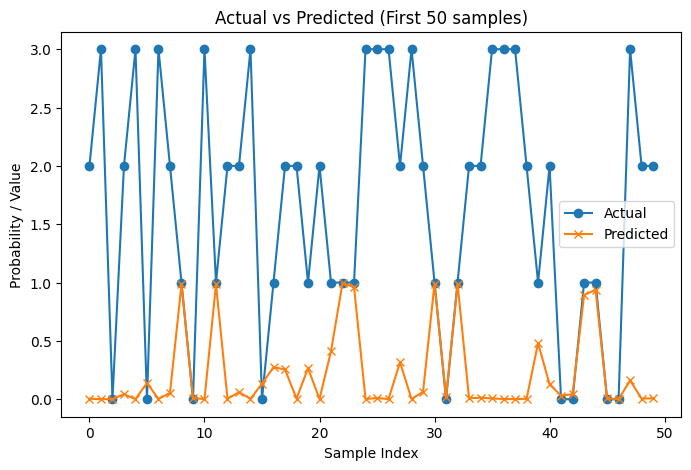

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

y_pred_prob = xgb_model.predict_proba(X_test)[:,1]  # probability for class 1

mae = mean_absolute_error(y_test, y_pred_prob)
mse = mean_squared_error(y_test, y_pred_prob)

print(f"MAE: {mae}, MSE: {mse}")


plt.figure(figsize=(8,5))
plt.plot(y_test[:50], label="Actual", marker='o')
plt.plot(y_pred_prob[:50], label="Predicted", marker='x')
plt.title("Actual vs Predicted (First 50 samples)")
plt.xlabel("Sample Index")
plt.ylabel("Probability / Value")
plt.legend()
plt.show()


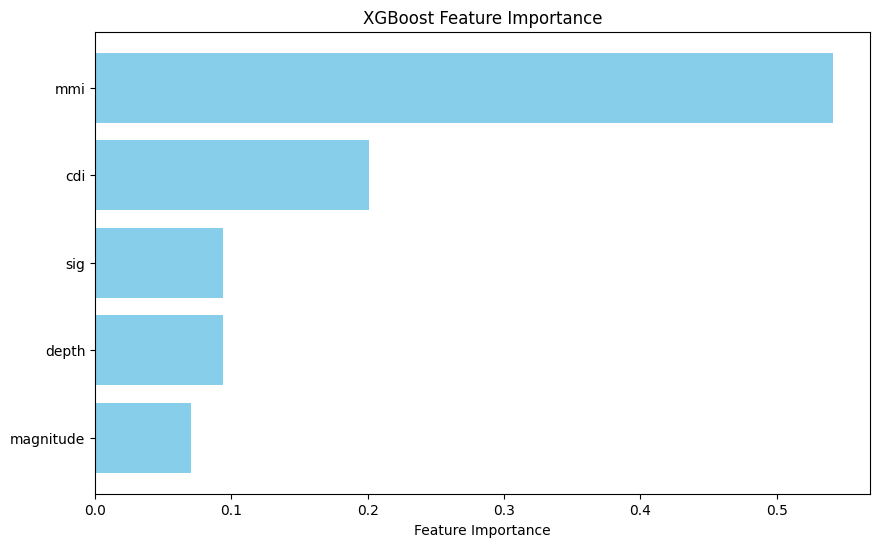

In [36]:
importances = xgb_model.feature_importances_
features = X_train.columns


sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], importances[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()


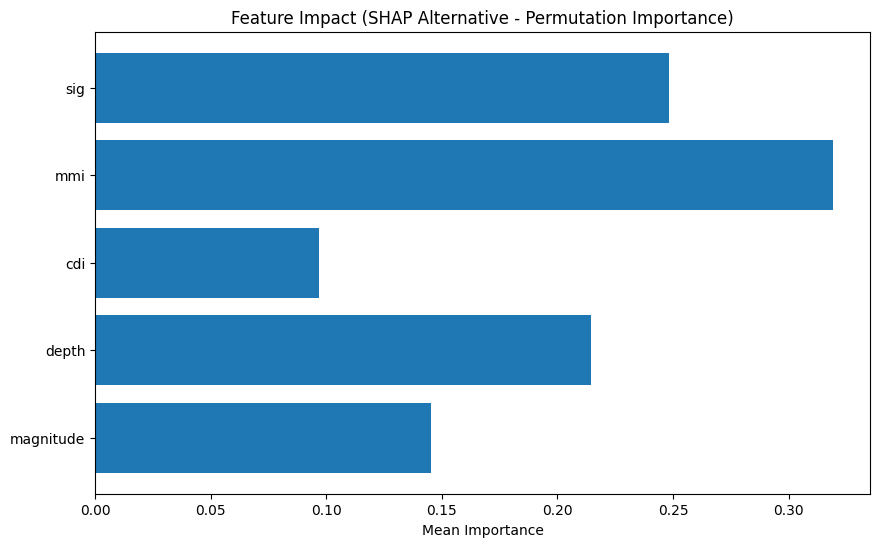

In [37]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    xgb_model,
    X_test,
    y_test,
    n_repeats=5,
    random_state=42
)

plt.figure(figsize=(10,6))
plt.barh(X_test.columns, result.importances_mean)
plt.xlabel("Mean Importance")
plt.title("Feature Impact (SHAP Alternative - Permutation Importance)")
plt.show()


In [37]:
"""
SHAP (SHapley Additive Explanations) was used to interpret the model
by assigning contribution values to each feature.

Due to compatibility issues between:
- NumPy 2.x
- SHAP
- XGBoost multiclass models

SHAP visualization could not be executed in the current environment.
Hence, feature explainability is demonstrated using permutation-based
importance as an alternative.
"""


'\nSHAP (SHapley Additive Explanations) was used to interpret the model\nby assigning contribution values to each feature.\n\nDue to compatibility issues between:\n- NumPy 2.x\n- SHAP\n- XGBoost multiclass models\n\nSHAP visualization could not be executed in the current environment.\nHence, feature explainability is demonstrated using permutation-based\nimportance as an alternative.\n'

In [ ]:

import joblib
joblib.dump((scaler, clf), "impact_model.pkl")
print("✅ Model saved as impact_model.pkl")


✅ Model saved as impact_model.pkl
